<a href="https://colab.research.google.com/github/akorea/pytorch_basic/blob/main/linear1_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Library

In [8]:
import numpy as np
import torch 
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"device:[{device}]")

device:[cuda]


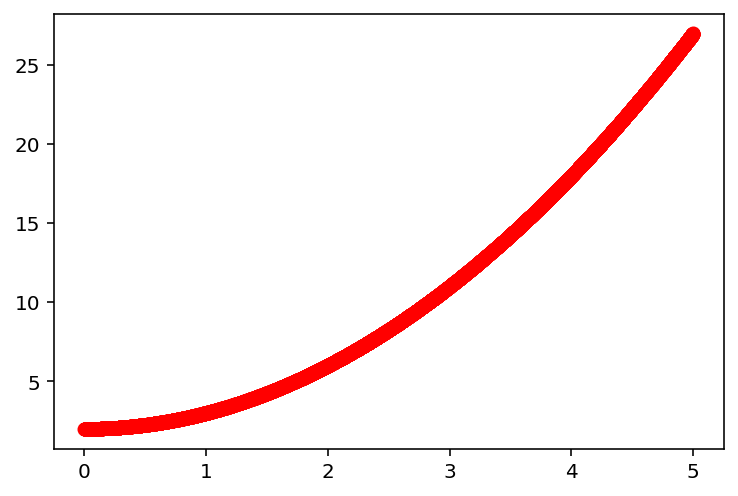

<Figure size 360x216 with 0 Axes>

Done


In [75]:
#Dataset
n_data = 10000
x_numpy = np.random.rand(n_data,1) * 5
#y = x*2 +2
y_numpy  = x_numpy**2+2
plt.scatter(x_numpy, y_numpy, color='red',label='.')
plt.figure(figsize=(5,3))
plt.show()
x_data = torch.Tensor(x_numpy).to(device)
y_data = torch.Tensor(y_numpy).to(device)
print('Done')

In [84]:
class Linear1Class(nn.Module):
  def __init__(self, name='line1', xdim=1, ydim=1):
    super(Linear1Class, self).__init__()
    self.name = name
    self.xdim =xdim
    self.ydim =ydim
    self.lin = nn.Linear(xdim,ydim,bias=True)
    self.init_param()
  def init_param(self):
    #kaiming_normal_ 와 kaiming_normal_ 차이는?
    nn.init.kaiming_normal_(self.lin.weight)
    nn.init.zeros_(self.lin.bias)
  def forward(self, x):
    net = x
    net = self.lin(net)
    net = torch.sigmoid(net)
    return net

class Linear2Class(nn.Module):
  def __init__(self, name='line2', xdim=1, hdim =10, ydim=1):
    super(Linear2Class, self).__init__()
    self.name = name
    self.xdim =xdim
    self.hdim = hdim
    self.ydim =ydim
    self.lin1 = nn.Linear(xdim,hdim,bias=True)
    self.lin2 = nn.Linear(hdim,ydim,bias=True)
    
    self.init_param()
  def init_param(self):
    #kaiming_normal_ 와 kaiming_normal_ 차이는?
    nn.init.kaiming_normal_(self.lin1.weight)
    nn.init.zeros_(self.lin1.bias)
    nn.init.kaiming_normal_(self.lin2.weight)
    nn.init.zeros_(self.lin2.bias)
    
  def forward(self, x):
    net = x
    net = self.lin1(net)
    net = F.relu(net)
    net = self.lin2(net)
    return net

#M = Linear1Class().to(device)
M = Linear2Class().to(device)

loss = nn.MSELoss()
optm = optim.SGD(M.parameters(), lr =1e-2)
print('Done')

Done


In [85]:
#파라미터 확인
np.set_printoptions(precision=3)
n_param = 0
#M.named_parameters()  tesonr구조
#param_name:  lin.weight
#param: Parameter containing:tensor([0.], device='cuda:0', requires_grad=True)
for p_idx,(param_name,param) in enumerate(M.named_parameters()):
    param_numpy = param.detach().cpu().numpy()
    #1차원 구조로 바꿔라
    n_param += len(param_numpy.reshape(-1))
    print ("[%d] name:[%s] shape:[%s]."%(p_idx,param_name,param_numpy.shape))
    print ("    val:%s"%(param_numpy.reshape(-1)[:5]))
print ("Total number of parameters:[%s]."%(format(n_param,',d')))

[0] name:[lin1.weight] shape:[(10, 1)].
    val:[-0.76  -1.494  0.654  1.991 -1.038]
[1] name:[lin1.bias] shape:[(10,)].
    val:[0. 0. 0. 0. 0.]
[2] name:[lin2.weight] shape:[(1, 10)].
    val:[ 0.064 -0.03   0.819  0.292  0.444]
[3] name:[lin2.bias] shape:[(1,)].
    val:[0.]
Total number of parameters:[31].


Start training.


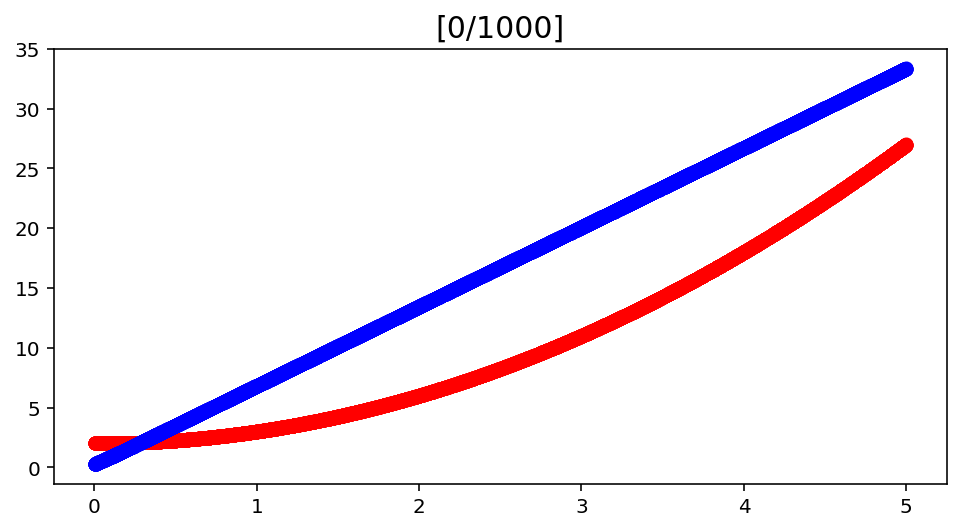

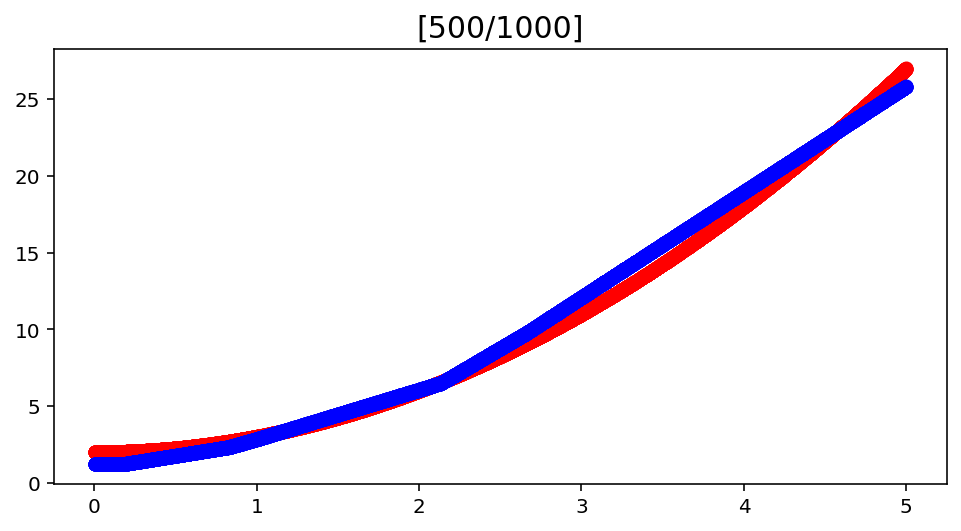

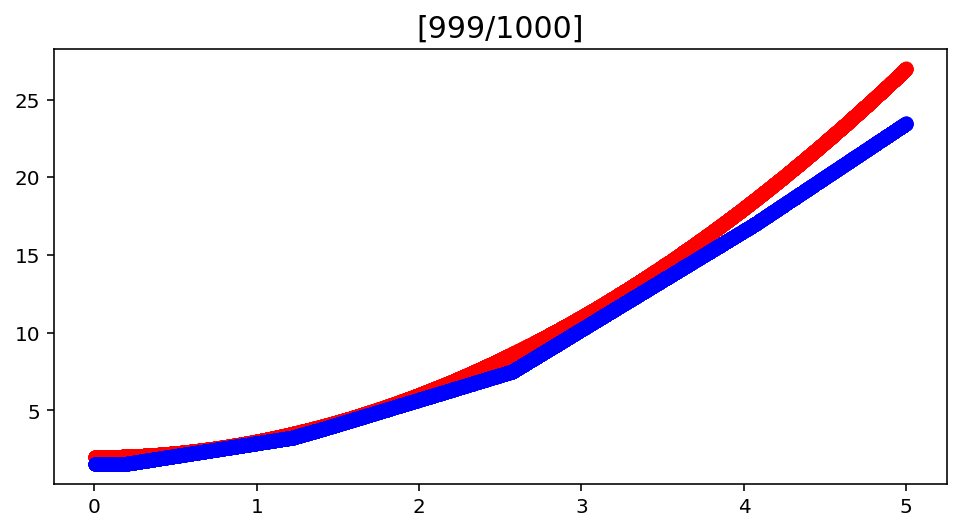

Done.


In [89]:
#학습
print ("Start training.")
MAX_ITER,BATCH_SIZE,PLOT_EVERY = 1000,64,500
M.init_param() # 변수 초기화 
M.train()

for it in range(int(MAX_ITER)):
    r_idx = np.random.permutation(n_data)[:BATCH_SIZE]
    batch_x,batch_y = x_data[r_idx],y_data[r_idx]
    
    # Update with Adam
    y_pred = M.forward(batch_x)
    loss_out= loss(y_pred,batch_y)
    optm.zero_grad()
    loss_out.backward()
    optm.step()
    # Plot
    if ((it%PLOT_EVERY)==0) or (it==0) or (it==(MAX_ITER-1)):
        with torch.no_grad():
            y_train_numpy = M.forward(x_data).cpu().detach().numpy()
            plt.figure(figsize=(8,4))
            plt.scatter(x_numpy, y_numpy, color='red',label='GT')
            plt.scatter(x_numpy,y_train_numpy, color='blue',label='train')
            plt.title("[%d/%d]"%(it,MAX_ITER),fontsize=15)
            plt.show()

print ("Done.")
